# Download Summary Plots

Take the data_statistics.csv file that shows us how many images we have for species. Merge with the moths list CSV file. Then create a histogram to see how many images we have for each species.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(2,10)})
plt.figure(figsize=(2,5))

<Figure size 200x500 with 0 Axes>

<Figure size 200x500 with 0 Axes>

In [13]:
home_dir = os.path.dirname(os.getcwd())
home_dir

'/bask/projects/v/vjgo8416-amber/projects/gbif_download_standalone'

## Using the Stats files

In [62]:
def report_image_counts_broken(stat_path, region_name, plot_both=True,
                        zoom_cutoff=400, font_color='black', bw=20,
                        break_lower = 1000, break_upper = 6000, ymax=6500):

    # Read data
    data_stats = pd.read_csv(stat_path)

    # Calculate species counts
    n_species = len(data_stats)
    n_species_1000 = len(data_stats[data_stats["n_imgs"] == 1000])
    n_species_0 = len(data_stats[data_stats["n_imgs"] == 0])
    n_images = data_stats["n_imgs"].sum()

    # Set seaborn style to dark
    sns.set_style("dark")

    upper_range = ymax-break_upper
    lower_range = break_lower

    # Create subplots
    fig, ax = plt.subplots(2, 1, figsize=(7.5, 4.5), sharex=True,
                        gridspec_kw={'height_ratios': [upper_range/lower_range, 1]})

    # Adjust plot styles for dark background and white font
    for a in ax:
        a.spines['bottom'].set_color(font_color)
        a.spines['top'].set_color(font_color)
        a.spines['left'].set_color(font_color)
        a.spines['right'].set_color(font_color)
        a.tick_params(axis='x', colors=font_color)
        a.tick_params(axis='y', colors=font_color)

    # Plot histogram
    sns.histplot(data_stats, color='indigo', ax=ax[0], x="n_imgs",
                binwidth=bw, palette='bright', edgecolor=font_color,
                linewidth=0.5, alpha=0.75)
    sns.histplot(data_stats, color='indigo', ax=ax[1], x="n_imgs",
                binwidth=bw, palette='bright', edgecolor=font_color,
                linewidth=0.5, alpha=0.75)
    ax[0].set_title(f"Histogram of image counts for {region_name} species", color=font_color)
    ax[1].set_xlabel("Image count", color=font_color)
    ax[1].set_ylabel("Species count", color=font_color)
    ax[0].set_ylabel("", color=font_color)

    # Apply broken y-axis
    ax[1].set_ylim(0, break_lower)
    ax[0].set_ylim(break_upper, ymax)

    # Hide the spines between break_lower and break_upper
    for a in ax:
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)
        a.spines['left'].set_visible(False)
        a.spines['right'].set_visible(False)

    ax[0].tick_params(axis='both', length=10, colors=font_color)
    ax[1].tick_params(axis='both', length=10, colors=font_color)

    # Add a break line
    d = .015
    kwargs = dict(transform=ax[0].transAxes, color=font_color, clip_on=False)
    ax[0].plot((-d, +d), (-d, +d), **kwargs)
    ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax[1].transAxes)
    ax[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    plt.savefig(f'./plots/{region_name}_image_counts_broken.png', transparent=True)


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def report_image_counts(stat_path, region_name, plot_both=True,
                        zoom_cutoff=400, font_color='black'):
    # Set seaborn style to dark
    sns.set_style("dark")

    data_stats = pd.read_csv(stat_path)
    n_species = len(data_stats)
    print(n_species)

    # How many with 1000?
    n_species_1000 = len(data_stats[data_stats["n_imgs"] == 1000])
    print(f"{n_species_1000} species have 1000 images for {region_name} (out of {n_species})")

    # How many with 1000?
    n_species_0 = len(data_stats[data_stats["n_imgs"] == 0])
    print(f"{n_species_0} species have 0 images for {region_name} (out of {n_species})")

    # Total number of images
    n_images = data_stats["n_imgs"].sum()
    print(f"Total of {n_images} images downloaded for {region_name}")

    if plot_both:
        fig, ax = plt.subplots(1, 2, figsize=(15, 3))
        ax0 = ax[0]
    else:
        fig, ax = plt.subplots(1, 1, figsize=(7.5, 3))
        ax0 = ax

    # Adjust plot styles for dark background and white font
    sns.histplot(data_stats, color='indigo', ax=ax0, x="n_imgs",
                 binwidth=20, palette='bright', edgecolor=font_color,
                 linewidth=0.5, alpha=0.75)
    ax0.set_title(f"Histogram of image counts for {region_name} species", color=font_color)
    ax0.set_xlabel("Image count", color=font_color)
    ax0.set_ylabel("Species count", color=font_color)
    ax0.tick_params(axis='both', colors=font_color)

    if plot_both:
        sns.histplot(data=data_stats.loc[data_stats['n_imgs'] > 0, ],
                    color='indigo', ax=ax[1], x="n_imgs", binwidth=20,
                    palette='bright', edgecolor=font_color, linewidth=0.5,
                    alpha=0.75)
        ax[1].set_title(f"Histogram of image counts for {region_name} species (>0 images)", color=font_color)
        ax[1].set_xlabel("Image count", color=font_color)
        ax[1].set_ylabel("Species count", color=font_color)
        ax[1].tick_params(axis='both', colors=font_color)

    # Save plot with transparent background for dark theme
    plt.savefig(f'./plots/{region_name}_image_counts.png', transparent=True)

## Downloaded Images

2690
565 species have 1000 images for UK (out of 2690)
126 species have 0 images for UK (out of 2690)
Total of 964303 images downloaded for UK


/tmp/ipykernel_783047/3755591121.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_stats, color='indigo', ax=ax0, x="n_imgs",
/tmp/ipykernel_783047/830745840.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_stats, color='indigo', ax=ax[0], x="n_imgs",
/tmp/ipykernel_783047/830745840.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_stats, color='indigo', ax=ax[1], x="n_imgs",


ValueError: keyword lw is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

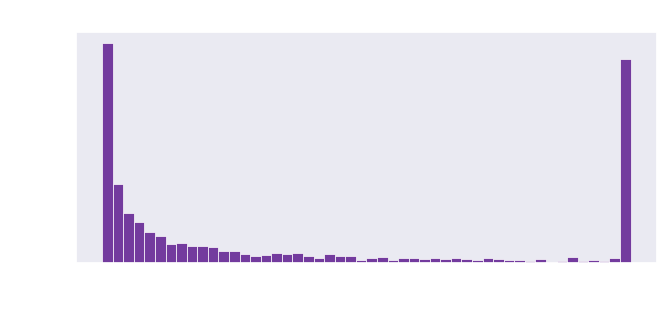

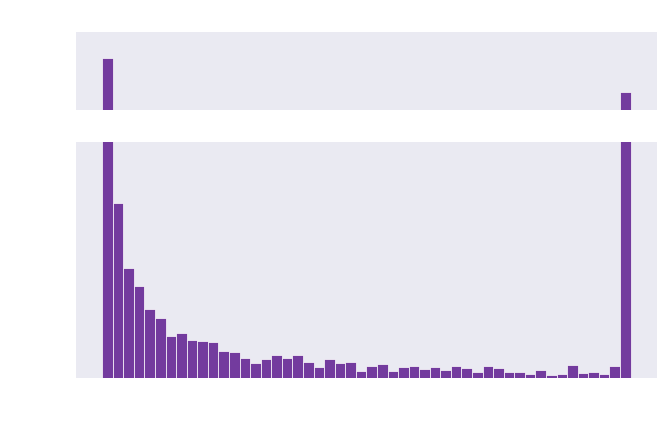

In [60]:
checklist_name = "uksi-moths-keys"
uk_path = os.path.join(home_dir,"data_stats_files","data_stats_"+checklist_name+".csv")

report_image_counts(uk_path, "UK", font_color='white', plot_both=False)
report_image_counts_broken(uk_path, "UK", font_color='white', plot_both=False, ymax=650, break_lower=300, break_upper=550)

In [ ]:
checklist_name = "uksi-macro-moths-keys"
uk_path = os.path.join(home_dir,"data_stats_files","data_stats_"+checklist_name+".csv")

report_image_counts(uk_path, "UK macro")

In [ ]:
checklist_name = "singapore-moths-keys-nodup"
singapore_path = os.path.join(home_dir,"data_stats_files","data_stats_"+checklist_name+".csv")

report_image_counts(singapore_path, "Singapore", font_color='white', plot_both=False)

5954
28 species have 1000 images for Costa Rica (out of 5954)
5893 species have 0 images for Costa Rica (out of 5954)
Total of 38856 images downloaded for Costa Rica


/tmp/ipykernel_783047/3755591121.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_stats, color='indigo', ax=ax0, x="n_imgs",
/tmp/ipykernel_783047/3908740201.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_stats, color='indigo', ax=ax[0], x="n_imgs",
/tmp/ipykernel_783047/3908740201.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_stats, color='indigo', ax=ax[1], x="n_imgs",


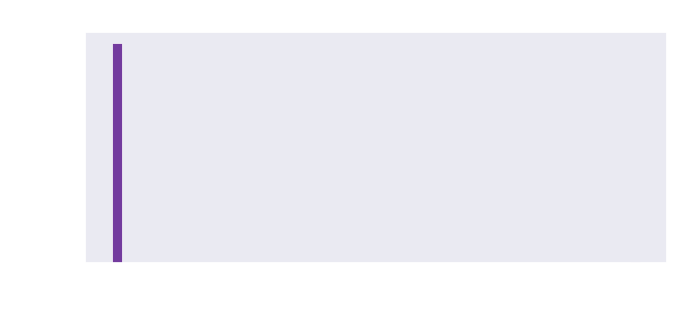

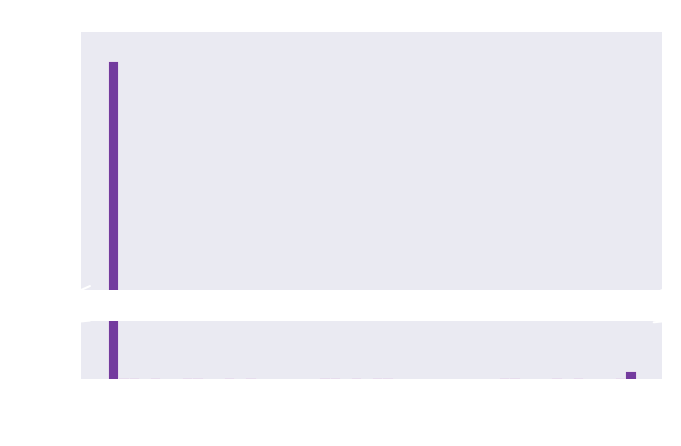

In [72]:
checklist_name = "costarica-moths-keys-nodup"
cr_path = os.path.join(home_dir,"data_stats_files","data_stats_"+checklist_name+".csv")

report_image_counts(cr_path, "Costa Rica", zoom_cutoff=50, font_color='white', plot_both=False)
report_image_counts_broken(cr_path, "Costa Rica", font_color='white', plot_both=False, ymax=6000, break_lower=200, break_upper=5100)

## Counting from file paths

First lets calculate the data statistics for the cropped images. 

In [ ]:
checklist_path = os.path.join(f"/bask/projects/v/vjgo8416-amber/projects/gbif_download_standalone/species_checklists/{checklist_name}.csv")

checklist_species = pd.read_csv(checklist_path)

checklist_species.head()


In [ ]:
import os
import pathlib  # BB

def report_crop_images(checklist_name,
                       region_name,
                       image_path = '/bask/homes/f/fspo1218/amber/data/binary_moth_training/gbif_crops/',
                       zoom_cutoff=400,
                       add_missing=True):

    result = [filepath for filepath in pathlib.Path(image_path).glob('**/*.jpg')]  # BB
    #result = [os.path.join(dp, f) for dp, dn, filenames in os.walk(image_path) for f in filenames if os.path.splitext(f)[1] == '.jpg']
    checklist_path = os.path.join(f"/bask/projects/v/vjgo8416-amber/projects/gbif_download_standalone/species_checklists/{checklist_name}-nodup.csv")

    checklist_species = pd.read_csv(checklist_path)

    df = pd.DataFrame({'path':result})

    df['species'] = [os.path.basename(os.path.dirname(path)) for path in df['path']]
    df['genus'] = [os.path.basename(os.path.dirname(os.path.dirname(path))) for path in df['path']]
    df['family'] = [os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(path)))) for path in df['path']]
    df = df.loc[df['species'] != '.ipynb_checkpoints', ]

    df2 = df[['species', 'genus', 'family']].value_counts()
    df2 = df2.reset_index(name='counts')
    df2.columns = ['species', 'genus', 'family', 'n_imgs']

    df2 = df2.loc[df2['species'].isin(checklist_species['species_name_provided']), ]



    # For each checklist_species not included, add a row with 0
    if add_missing:
        checklist_missing = checklist_species.loc[~checklist_species['gbif_species_name'].isin(df2['species']), ]
        checklist_missing = checklist_missing[['gbif_species_name', 'genus_name', 'family_name']]
        checklist_missing['n_imgs'] = 0
        checklist_missing.columns = ['species', 'genus', 'family', 'n_imgs']
        df2 = pd.concat([df2, checklist_missing])

    # How many with 500?
    n_species=df2.shape[0]
    n_species_1000 = len(df2[df2["n_imgs"] >= 1000])
    print(f"{n_species_1000} species have ≥ 1000 images (out of {n_species})")

    n_species_0 = len(df2[df2["n_imgs"] == 0])
    print(f"{n_species_0} species have 0 images (out of {n_species})")

    #return df2
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df2,
                ax=ax[0],
                x="n_imgs",
                binwidth=20).set(title=f"Histogram of cropped image counts for {region_name} species")

    ax[0].set_xlabel("Image count")
    ax[0].set_ylabel("Species count")

    sns.histplot(df2.loc[df2['n_imgs'] <= 400, ],
                ax=ax[1],
                  x="n_imgs",
                  binwidth=20).set(title=f"Histogram of cropped image counts for {region_name} species\n(zoomed to n ≤ {zoom_cutoff})")

    ax[1].set_xlabel("Image count")
    ax[1].set_ylabel("Species count")
    plt.savefig(f'./plots/{region_name}_image_counts_cropped.png', bbox_inches="tight")

    return df2

In [ ]:
out = report_crop_images("uksi-moths-keys", "UK Macro",
                         image_path = '/bask/homes/f/fspo1218/amber/data/gbif_download_standalone/gbif_images/',
                         add_missing=True)

out.head()

In [ ]:
out.shape

In [ ]:
out[out['species'].str.contains('cossus', case=False)]

In [ ]:
report_crop_images("uksi-moths-keys", "UK",
                   image_path = '/bask/homes/f/fspo1218/amber/data/gbif_download_standalone/gbif_images/',
                   add_missing=False)

In [ ]:
report_crop_images("singapore-moths-keys", "Singapore", add_missing=True)

In [ ]:
report_crop_images("costarica-moths-keys", "Costa Rica", add_missing=False)